## Objective:
To generate dummy data for 5000 users and perform customer segmentation using:

i. RFM (Recency, Frequency, Monetary) Analysis:

A widely used method for segmenting customers based on their purchasing behavior.

ii. KMeans Clustering:

A technique to group customers into clusters based on feature similarities.

iii. Hierarchical Clustering:

Another clustering technique that can visualize cluster formations as a dendrogram


### Step 1: Generate Dummy Data

In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate User ID
num_users = 5000
user_id = np.arange(1, num_users + 1)

# Generate random last login dates (Recency)
end_date = datetime(2023, 12, 31)
current_date = [end_date] * num_users
last_login_dates = [end_date - timedelta(days=np.random.randint(1, 90)) for _ in range(num_users)]
recency = [(end_date - login).days for login in last_login_dates]

# Generate random login frequencies (Frequency)
number_of_logins = np.random.randint(1, 30, num_users)

# Generate Subscription Type and corresponding Monetary values
subscription_types = ['Basic', 'Standard', 'Premium']
subscription_amounts = {'Basic': 100, 'Standard': 150, 'Premium': 200}

subscription_type = np.random.choice(subscription_types, num_users)
monetary_value = [subscription_amounts[sub] for sub in subscription_type]

# Generate random AI Interview Scores
ai_interview_score = np.random.randint(50, 100, num_users)

# Generate random number of resumes built
resumes_built = np.random.randint(0, 10, num_users)

# Generate random number of job applications sent
job_applications_sent = np.random.randint(0, 50, num_users)

# Create the DataFrame
df = pd.DataFrame({
    'user_id': user_id,
    'last_login_date': last_login_dates,
    'current_date': current_date,
    'num_days_last_login': recency,
    'number_of_logins': number_of_logins,
    'subscription_type': subscription_type,
    'subscription_amount': monetary_value,
    'ai_interview_score': ai_interview_score,
    'num_resumes_built': resumes_built,
    'job_applications_sent': job_applications_sent
})

df.to_csv('clustering_analysis_DummyData.csv')
# Show the first few rows of data
df.head()

,user_id,last_login_date,current_date,num_days_last_login,number_of_logins,subscription_type,subscription_amount,ai_interview_score,num_resumes_built,job_applications_sent
0,1,2023-11-09,2023-12-31,52,19,Premium,200,71,1,32
1,2,2023-12-16,2023-12-31,15,13,Basic,100,78,1,16
2,3,2023-10-20,2023-12-31,72,25,Standard,150,68,3,30
3,4,2023-10-31,2023-12-31,61,28,Standard,150,68,7,9
4,5,2023-12-10,2023-12-31,21,26,Premium,200,55,1,5


### Step 2: Perform RFM Analysis
RFM (Recency, Frequency, Monetary)
analysis is used to segment customers based on their behavior:

Recency: How recently a user has engaged with Lightforth’s services.
Frequency: How often a user has engaged with Lightforth’s services.
Monetary: The amount the user has spent on Lightforth's paid services.
Steps:
Assign RFM scores based on quantiles. Users with the highest
recency (most recent engagement), frequency, and monetary values should have higher scores.

In [2]:
df['recency'] = (df['current_date'] - df['last_login_date']).dt.days / 2
df['frequency'] = df['number_of_logins']
df['monetary']   = df['subscription_amount']
df.sample()

,user_id,last_login_date,current_date,num_days_last_login,number_of_logins,subscription_type,subscription_amount,ai_interview_score,num_resumes_built,job_applications_sent,recency,frequency,monetary
2384,2385,2023-11-30,2023-12-31,31,9,Basic,100,93,5,48,15.5,9,100


In [3]:
df['recency'].unique()

array([26. ,  7.5, 36. , 30.5, 10.5, 41.5, 43.5, 37.5, 44. , 12. ,  1.5,
       11. , 26.5,  1. , 15. , 19. , 32. , 30. , 16.5, 38. , 29. , 44.5,
       24.5, 29.5, 21. , 40. , 31. , 23.5, 25.5, 27.5,  3.5, 36.5, 19.5,
        9. ,  2. ,  7. ,  4.5, 42. , 35.5, 22. ,  4. , 17.5, 39. , 40.5,
       18. , 25. ,  3. , 27. , 31.5, 17. , 37. , 24. , 20. , 42.5, 41. ,
       13. , 20.5, 14.5, 22.5, 32.5,  0.5,  5.5,  2.5, 14. ,  6. , 11.5,
       18.5, 43. , 13.5, 39.5, 38.5, 21.5,  6.5, 16. , 33. , 28.5, 35. ,
       28. ,  9.5, 34. ,  8.5, 34.5,  8. , 10. , 33.5, 15.5, 12.5, 23. ,
        5. ])

In [4]:
# RFM Score Calculation
df['r_score'] = pd.qcut(df['recency'], 4, labels=[4, 3, 2, 1])  # Lower recency is better
df['f_score'] = pd.qcut(df['frequency'], 4, labels=[1, 2, 3, 4])  # Higher frequency is better
df['m_score'] = pd.qcut(df['monetary'], 3, labels=[1, 2], duplicates='drop')  # Handle duplicate bin edges

In [5]:
# RFM Segment and Score
df['rfm_segment'] = df['r_score'].astype(str) + df['f_score'].astype(str) + df['m_score'].astype(str)
df['rfm_score'] = df[['r_score', 'f_score', 'm_score']].sum(axis=1)

# Show the RFM Segments
df[['user_id', 'rfm_segment', 'rfm_score']].head()

,user_id,rfm_segment,rfm_score
0,1,232,7
1,2,421,7
2,3,141,6
3,4,241,7
4,5,442,10


In [6]:
import pandas as pd

# Data for the RFM segments and recommendations
data = {
    'RFM Score': ['9-10', '7-8', '5-6', '3-4', '1-2'],
    'Segment': ['Best Customers', 'Loyal Customers', 'Potential Loyalists', 'At-Risk Customers', 'Lost Customers'],
    'Description': [
        'Recent, frequent, and high-spending users.',
        'High frequency and spending, but slightly lower recency.',
        'Medium engagement; users could increase spending with the right incentives.',
        'Past customers with lower engagement and spending.',
        'Inactive or low-value users who have likely churned.'
    ],
    'Recommendation': [
        'Offer exclusive rewards, premium upsells, and referrals.',
        'Incentivize with loyalty programs, increase engagement, and provide personalized offers.',
        'Provide targeted offers, send educational content, and increase interaction.',
        'Run reactivation campaigns and collect feedback to prevent churn.',
        'Try aggressive win-back campaigns or gather feedback for future improvements.'
    ]
}

# Create the DataFrame
rfm_df = pd.DataFrame(data)

# Show the DataFrame
rfm_df


,RFM Score,Segment,Description,Recommendation
0,9-10,Best Customers,"Recent, frequent, and high-spending users.","Offer exclusive rewards, premium upsells, and ..."
1,7-8,Loyal Customers,"High frequency and spending, but slightly lowe...","Incentivize with loyalty programs, increase en..."
2,5-6,Potential Loyalists,Medium engagement; users could increase spendi...,"Provide targeted offers, send educational cont..."
3,3-4,At-Risk Customers,Past customers with lower engagement and spend...,Run reactivation campaigns and collect feedbac...
4,1-2,Lost Customers,Inactive or low-value users who have likely ch...,Try aggressive win-back campaigns or gather fe...


### Step three: Clustering

In [7]:
"""
Step 3: Pre-process Data for Clustering
Before applying KMeans or Hierarchical clustering, the data needs to be pre-processed:

Handling categorical variables: No need here, as all features are numerical.
Scaling: Normalize or standardize features to ensure clustering algorithms work effectively.
"""

'\nStep 3: Pre-process Data for Clustering\nBefore applying KMeans or Hierarchical clustering, the data needs to be pre-processed:\n\nHandling categorical variables: No need here, as all features are numerical.\nScaling: Normalize or standardize features to ensure clustering algorithms work effectively.\n'

In [8]:
df.columns


Index(['user_id', 'last_login_date', 'current_date', 'num_days_last_login',
       'number_of_logins', 'subscription_type', 'subscription_amount',
       'ai_interview_score', 'num_resumes_built', 'job_applications_sent',
       'recency', 'frequency', 'monetary', 'r_score', 'f_score', 'm_score',
       'rfm_segment', 'rfm_score'],
      dtype='object')

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Select features for clustering
features = ['recency', 'frequency', 'monetary']

# Standardize the features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])

# Convert scaled data back to DataFrame for readability
df_scaled = pd.DataFrame(df_scaled, columns=features)
df_scaled.head()


,recency,frequency,monetary
0,0.579545,0.642857,1.0
1,0.159091,0.428571,0.0
2,0.806818,0.857143,0.5
3,0.681818,0.964286,0.5
4,0.227273,0.892857,1.0


### Step 4: Apply KMeans Clustering


Now that the data is scaled, we can apply KMeans clustering.
First, we need to determine the optimal number of clusters using the Elbow Method.


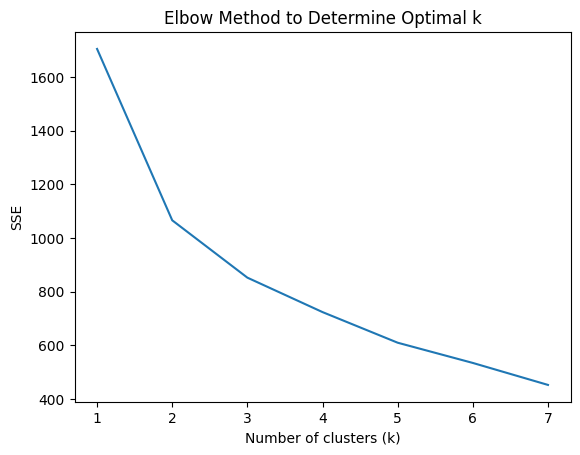

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_rng = range(1, 8)
sse = []
for k in k_rng:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_rng, sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [11]:
# Apply KMeans with optimal number of clusters

kmeans_model = KMeans(n_clusters=3, random_state=42)
y_predicted = kmeans_model.fit_predict(df_scaled)

df['cluster'] = y_predicted

df.sample(5) # Check the distribution of customers across clusters

,user_id,last_login_date,current_date,num_days_last_login,number_of_logins,subscription_type,subscription_amount,ai_interview_score,num_resumes_built,job_applications_sent,recency,frequency,monetary,r_score,f_score,m_score,rfm_segment,rfm_score,cluster
3279,3280,2023-11-26,2023-12-31,35,27,Standard,150,84,2,48,17.5,27,150,3,4,1,341,8,2
1241,1242,2023-12-29,2023-12-31,2,27,Premium,200,94,6,43,1.0,27,200,4,4,2,442,10,2
2121,2122,2023-11-30,2023-12-31,31,26,Basic,100,55,5,24,15.5,26,100,3,4,1,341,8,1
129,130,2023-10-27,2023-12-31,65,11,Standard,150,90,5,45,32.5,11,150,2,2,1,221,5,0
2861,2862,2023-10-28,2023-12-31,64,26,Basic,100,61,7,33,32.0,26,100,2,4,1,241,7,1


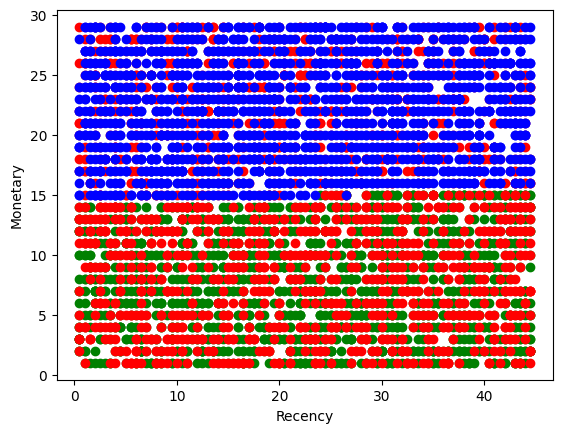

In [12]:
# Visualize the centroids and data points in each cluster using scatterplots of recency and monetary

df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

plt.scatter(df0.recency, df0.frequency, color='green')
plt.scatter(df1.recency, df1.frequency, color='red')
plt.scatter(df2.recency, df2.frequency, color='blue')

plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(df_scaled, kmeans_model.labels_)
print("\nSilhouette Score using KMeans:", silhouette_kmeans)


Silhouette Score using KMeans: 0.3056215226127188


### Step 5: Apply Hierarchical Clustering

Hierarchical Clustering can be deployed to group users into clusters. This technique doesn’t require specifying the number of clusters beforehand

In [14]:
# Select features for clustering
from sklearn.preprocessing import StandardScaler

variables = ['recency', 'frequency', 'monetary']

# Standardize the features
scaler = StandardScaler()
df_hier = scaler.fit_transform(df[variables])

# Convert scaled data back to DataFrame for readability
df_hier = pd.DataFrame(df_hier, columns=features)
df_hier.sample()

,recency,frequency,monetary
3666,-0.797704,0.096828,-1.195242


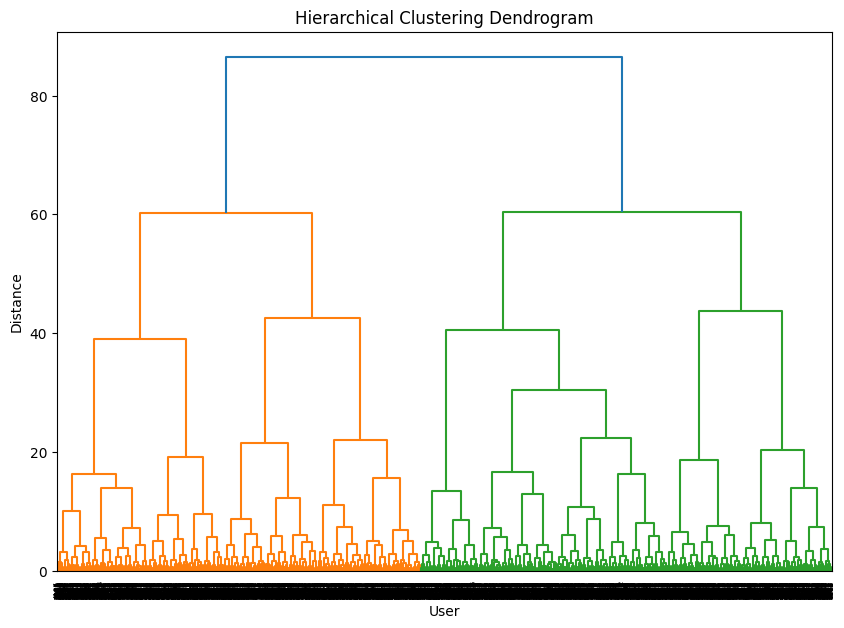

In [20]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
import scipy.cluster.hierarchy as sch

hierarchical_model = sch.linkage(df_hier, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(hierarchical_model)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('User')
plt.ylabel('Distance')
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

K = 3
hc = AgglomerativeClustering(n_clusters=K, linkage='average', metric='manhattan').fit(df_hier)
df['cluster_label']  = hc.labels_
df['cluster_label'] = df['cluster_label'].astype('int64')

In [17]:
silhouette_hc = silhouette_score(df_hier, hc.labels_)
print("\nSilhouette Score using Hierachical Clustering:", silhouette_hc)


Silhouette Score using Hierachical Clustering: 0.19668740885708572


In [ ]:
"""
Step 6: Visualize Clusters
To understand the clusters better, we can reduce the dimensionality of the dataset using PCA (Principal Component Analysis) and plot the clusters in 2D.
"""

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Example of assigning users to a group based on KMeans clusters
df[['user_id', 'cluster']].head()

In [ ]:
# Group by cluster and calculate the mean for each feature
cluster_summary = df.groupby('cluster')[features].mean()
cluster_summary
